In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
from lmfit import Model, minimize, Parameters, report_fit
from lmfit.models import GaussianModel, PolynomialModel
import astropy.units as u
import pandas as pd

In [2]:
def Gauss(x, h1, c1, w1):
    G = h1*np.exp(-(x-c1)**2/(2*w1**2))
    return G

def doubleGauss(x, h1, c1, w1, h2, c2, w2):
    G = h1*np.exp(-(x-c1)**2/(2*w1**2)) + h2*np.exp(-(x-c2)**2/(2*w2**2))
    return G

def tripleGauss(x, h1, c1,w1, h2, c2, w2, h3, c3, w3):
    G = h1*np.exp(-(x-c1)**2/(2*w1**2)) + h2*np.exp(-(x-c2)**2/(2*w2**2)) + h3*np.exp(-(x-c3)**2/(2*w3**2))
    return G


In [3]:
def plot_coord(l, b, n_HI = 1, n_65 = 1, n_67 = 1, n_CO = 1, HI_p0 = [1, 0, 1], OH65_p0 = [0.03, 0, 4], OH67_p0 = [0.03, 0, 4], CO_p0 = [1, 0, 1], HI_bounds = (-np.inf, np.inf), OH65_bounds = (-np.inf, np.inf), OH67_bounds = (-np.inf, np.inf), CO_bounds = (-np.inf, np.inf)):
    
    # Setup a pandas dataframe to save all the variables we'd like
    
    '''Purpose:
    This function fits multiple gaussians to HI, CO and HI data and returns the parameters...
    
    Parameters:
    l: galactic latitude, int
    b: galactic lontitude, int
    HIdata: np.array of HI data in Tb, vel
    OHdata: np.array of OH data in Tb, vel
    ...

    Returns a pandas dataframe
    '''
    OH67 = ascii.read('C:/Users/seven/OneDrive/Documents/DustSurvey/OH' + str(l) + 'p' + str(b) + '_67basesub.txt')
    OH65 = ascii.read('C:/Users/seven/OneDrive/Documents/DustSurvey/OH' + str(l) + 'p' + str(b) + '_65basesub.txt')
    HI = ascii.read('C:/Users/seven/OneDrive/Documents/DustSurvey/HI' + str(l) + 'p' + str(b) + '.txt', data_start = 13, data_end = 167)
    CO = ascii.read('C:/Users/seven/OneDrive/Documents/DustSurvey/CO' + str(l) + 'p' + str(b) + '.txt')

    velHI = HI['col1']
    TaHI = HI['col2']
    vel67 = OH67['col1']
    Ta67 = OH67['col2']
    vel65 = OH65['col1']
    Ta65 = OH65['col2']
    velCO = CO['col1']
    TaCO = CO['col2']

    #fit HI data
    if n_HI == 1:

        parametersHI, covarianceHI = curve_fit(Gauss, velHI, TaHI, HI_p0, bounds = HI_bounds)

        fitHIh = parametersHI[0]
        fitHIc = parametersHI[1]
        fitHIw = parametersHI[2]
        fit_HIy = Gauss(velHI, fitHIh, fitHIc, fitHIw)

        
    if n_HI == 2:
        
        HI_p0 = np.tile(HI_p0, n_HI)
        
        parametersHI, covarianceHI = curve_fit(doubleGauss, velHI, TaHI, HI_p0, bounds = HI_bounds)

        fitHIh = parametersHI[0]
        fitHIh2 = parametersHI[3]
        fitHIc = parametersHI[1]
        fitHIc2 = parametersHI[4]
        fitHIw = parametersHI[2]
        fitHIw2 = parametersHI[5]
        
        fit_HIy = doubleGauss(velHI, fitHIh, fitHIc, fitHIw, fitHIh2, fitHIc2, fitHIw2)
        

            
    if n_HI == 3:
        
        HI_p0 = np.tile(HI_p0, n_HI)
        
        parametersHI, covarianceHI = curve_fit(tripleGauss, velHI, TaHI, HI_p0, bounds = HI_bounds)
        
        fitHIh = parametersHI[0]
        fitHIh2 = parametersHI[3]
        fitHIh3 = parametersHI[6]
        fitHIc = parametersHI[1]
        fitHIc2 = parametersHI[4]
        fitHIc3 = parametersHI[7]
        fitHIw = parametersHI[2]
        fitHIw2 = parametersHI[5]
        fitHIw3 = parametersHI[8]
        
        fit_HIy = tripleGauss(velHI, fitHIh, fitHIc, fitHIw, fitHIh2, fitHIc2, fitHIw2, fitHIh3, fitHIc3, fitHIw3)
        


            
    #fit 65 data
    
    if n_65 == 1:
        parameters65, covariance65 = curve_fit(Gauss, vel65, Ta65, OH65_p0, bounds = OH65_bounds)
        
        fit65h = parameters65[0]
        fit65c = parameters65[1]
        fit65w = parameters65[2]
        fit_65y = Gauss(vel65, fit65h, fit65c, fit65w)

    
    if n_65 == 2:
        
        OH65_p0 = np.tile(OH65_p0, n_65)
        
        parameters65, covariance65 = curve_fit(doubleGauss, vel65, Ta65, OH65_p0, bounds = OH65_bounds)
    
        fit65h = parameters65[0]
        fit65h2 = parameters65[3]
        fit65c = parameters65[1]
        fit65c2 = parameters65[4]
        fit65w = parameters65[2]
        fit65w2 = parameters65[5]
        
        fit_65y = doubleGauss(vel65, fit65h, fit65c, fit65w, fit65h2, fit65c2, fit65w2)
  
    if n_65 == 3:
        
        OH65_p0 = np.tile(OH65_p0, n_65)
        parameters65, covariance65 = curve_fit(tripleGauss, vel65, Ta65, OH65_p0, bounds = OH65_bounds)    
        
        fit65h = parameters65[0]
        fit65h2 = parameters65[3]
        fit65h3 = parameters65[6]
        fit65c = parameters65[1]
        fit65c2 = parameters65[4]
        fit65c3 = parameters65[7]
        fit65w = parameters65[2]
        fit65w2 = parameters65[5]
        fit65w3 = parameters65[8]
        
        fit_65y = tripleGauss(vel65, fit65h, fit65c, fit65w, fit65h2, fit65c2, fit65w2, fit65h3, fit65c3, fit65w3)
        

    #fit 67 data
    
    if n_67 == 1:
        parameters67, covariance67 = curve_fit(Gauss, vel67, Ta67, OH67_p0, bounds = OH67_bounds)
        
        fit67h = parameters67[0]
        fit67c = parameters67[1]
        fit67w = parameters67[2]
        fit_67y = Gauss(vel67, fit67h, fit67c, fit67w)

        
    if n_67 == 2:
        
        OH67_p0 = np.tile(OH67_p0, n_67)
        parameters67, covariance67 = curve_fit(doubleGauss, vel67, Ta67, OH67_p0, bounds = OH67_bounds)

        fit67h = parameters67[0]
        fit67h2 = parameters67[3]
        fit67c = parameters67[1]
        fit67c2 = parameters67[4]
        fit67w = parameters67[2]
        fit67w2 = parameters67[5]
        
        fit_67y = doubleGauss(vel67, fit67h, fit67c, fit67w, fit67h2, fit67c2, fit67w2)
                
    
    if n_67 == 3:
        
        OH67_p0 = np.tile(OH67_p0, n_67)
        parameters67, covariance67 = curve_fit(tripleGauss, vel67, Ta67, OH67_p0, bounds = OH67_bounds) 
    
        fit67h = parameters67[0]
        fit67h2 = parameters67[3]
        fit67h3 = parameters67[6]
        fit67c = parameters67[1]
        fit67c2 = parameters67[4]
        fit67c3 = parameters67[7]
        fit67w = parameters67[2]
        fit67w2 = parameters67[5]
        fit67w3 = parameters67[8]
        
        fit_67y = tripleGauss(vel67, fit67h, fit67c, fit67w, fit67h2, fit67c2, fit67w2, fit67h3, fit67c3, fit67w3)
                

    #fit CO data
    
    if n_CO == 1:
        parametersCO, covarianceCO = curve_fit(Gauss, velCO, TaCO, CO_p0,bounds =  CO_bounds)
            
        fitCOh = parametersCO[0]
        fitCOc = parametersCO[1]
        fitCOw = parametersCO[2]
        fit_COy = Gauss(velCO, fitCOh, fitCOc, fitCOw)

    if n_CO == 2:
        
        CO_p0 = np.tile(CO_p0, n_CO)
        parametersCO, covarianceCO = curve_fit(doubleGauss, velCO, TaCO, CO_p0, bounds = CO_bounds)
    
        fitCOh = parametersCO[0]
        fitCOh2 = parametersCO[3]
        fitCOc = parametersCO[1]
        fitCOc2 = parametersCO[4]
        fitCOw = parametersCO[2]
        fitCOw2 = parametersCO[5]
        
        fit_COy = doubleGauss(velCO, fitCOh, fitCOc, fitCOw, fitCOh2, fitCOc2, fitCOw2)

    if n_CO == 3:
        
        CO_p0 = np.tile(CO_p0, n_CO)
        parametersCO, covarianceCO = curve_fit(tripleGauss, velCO, TaCO, CO_p0, bounds = CO_bounds) 
        
        fitCOh = parametersCO[0]
        fitCOh2 = parametersCO[3]
        fitCOh3 = parametersCO[6]
        fitCOc = parametersCO[1]
        fitCOc2 = parametersCO[4]
        fitCOc3 = parametersCO[7]
        fitCOw = parametersCO[2]
        fitCOw2 = parametersCO[5]
        fitCOw3 = parametersCO[8]
        
        fit_COy = tripleGauss(velCO, fitCOh, fitCOc, fitCOw, fitCOh2, fitCOc2, fitCOw2, fitCOh3, fitCOc3, fitCOw3)
                                    


    plt.figure(figsize = (8, 8))
    
    plt.step(vel67, (Ta67*1.05)*12 + 1.5, 'grey')
    plt.step(vel67, fit_67y*12 + 1.5, 'blue', alpha=0.5, ls = 'dashed', label = 'OH 1667 MHz')

    plt.step(vel65, (Ta65*1.05)*12+0.6, 'grey')
    plt.step(vel65, fit_65y*12+0.6, 'purple', alpha=0.5, ls = 'dashed', label = 'OH 1665 MHz')
    

    plt.step(velCO, TaCO/4-0.8, 'grey')
    plt.step(velCO, fit_COy/4-0.8, 'red', alpha=0.5, ls = 'dashed', label = 'CO')

    plt.step(velHI, TaHI/60-0.2, 'grey')
    plt.step(velHI, fit_HIy/60 -0.2, 'green', alpha=0.5, ls = 'dashed', label = 'HI')
    
    plt.xlim(-100, 100)    
    
    plt.xlabel(r'$v_{\mathrm{LSR}}$ (km/s)', size=16)
    plt.ylabel(r'Scaled $T_{\mathrm{mb}}$ (K)', size=16)
    plt.title(r'HI, CO, OH @ $l$ = ' + str(l) + '$^{\circ}$, $b$ = ' + str(b) + '$^{\circ}$') 
    plt.legend()
    plt.tight_layout()

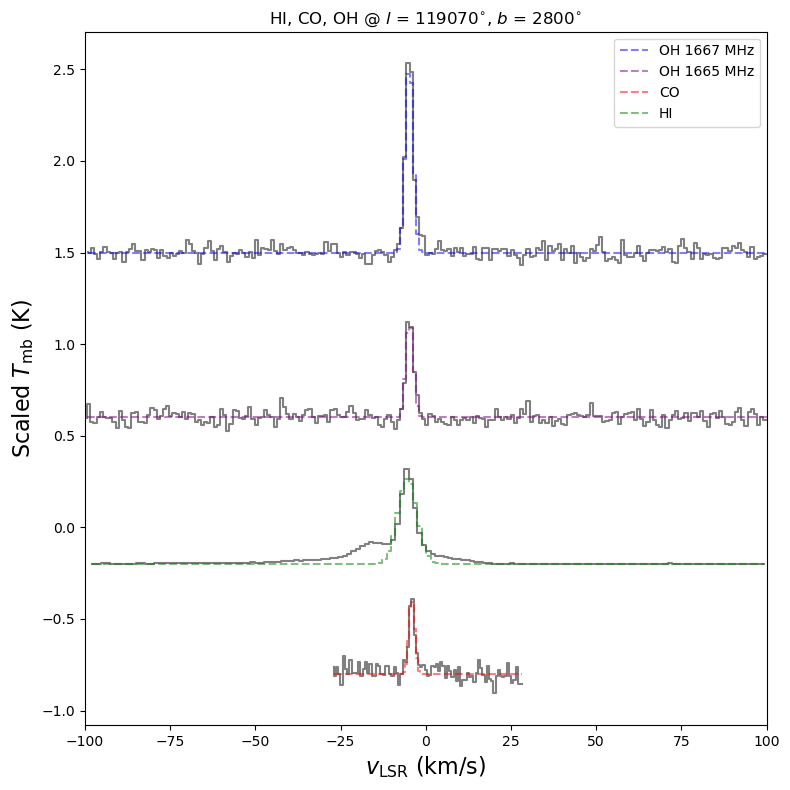

In [4]:
plot_coord(119070, 2800)

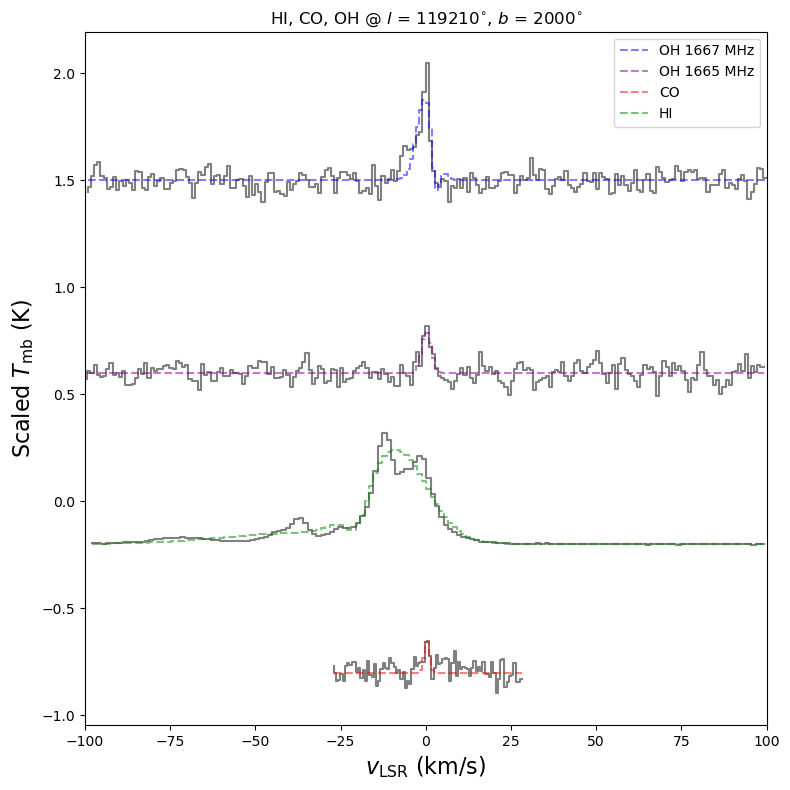

In [14]:
plot_coord(119210, 2000, n_HI = 3, n_67 = 2, OH67_p0 = (1, 0, 8))

In [103]:
#plot_coord(119380, 3967) null

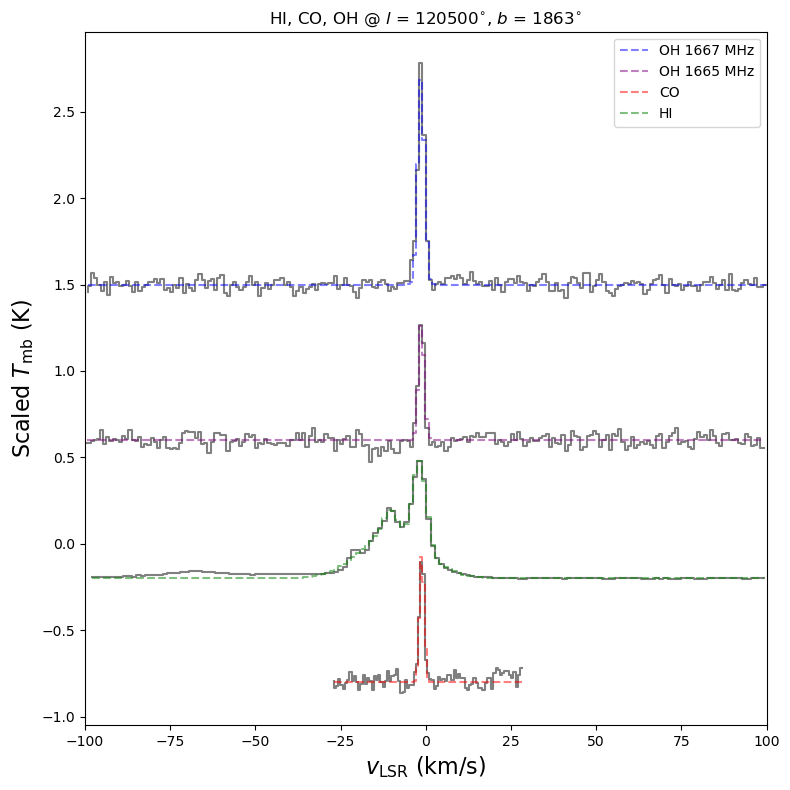

In [111]:
plot_coord(120500, 1863, n_HI = 3)

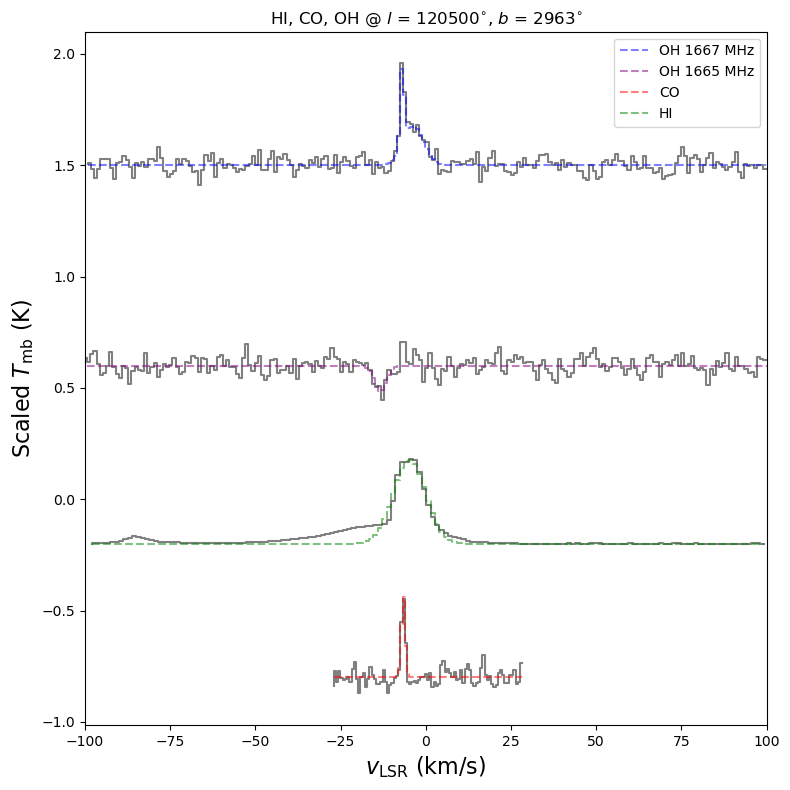

In [28]:
plot_coord(120500, 2963, n_67 = 2, OH67_p0 = [1, 0, 2], CO_p0 = [1, -5, 0.5], 
           OH65_p0 = [-1, -8, 1])

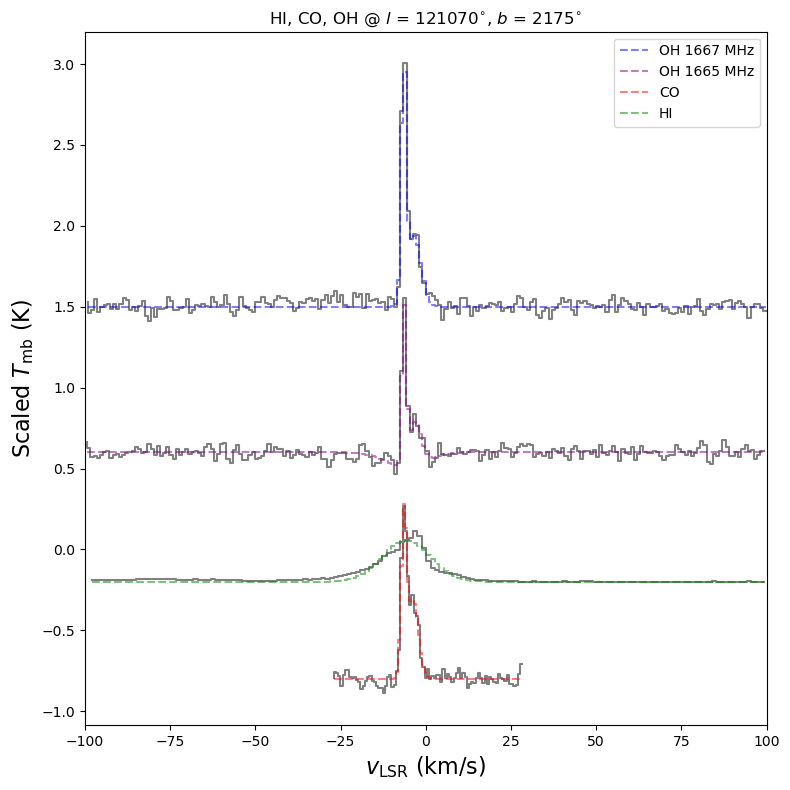

In [115]:
plot_coord(121070, 2175, n_65 = 3, n_67 = 2, n_CO = 2)

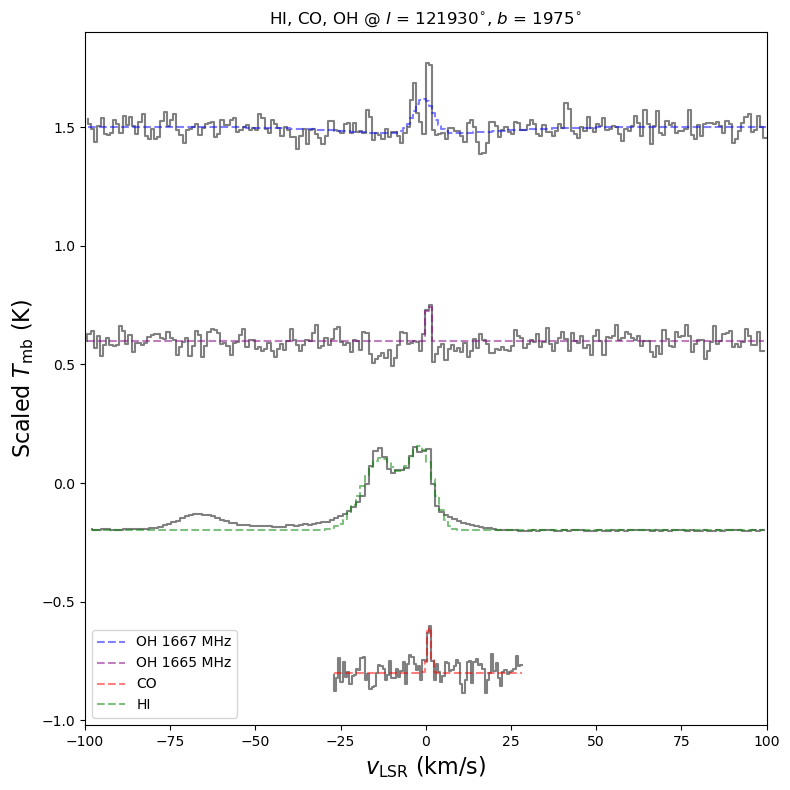

In [40]:
plot_coord(121930, 1975, n_HI = 2, n_67 = 2, OH67_p0 = (1, 0, 8), HI_p0 = (1.3, -10, 4)) #issues with 67 double

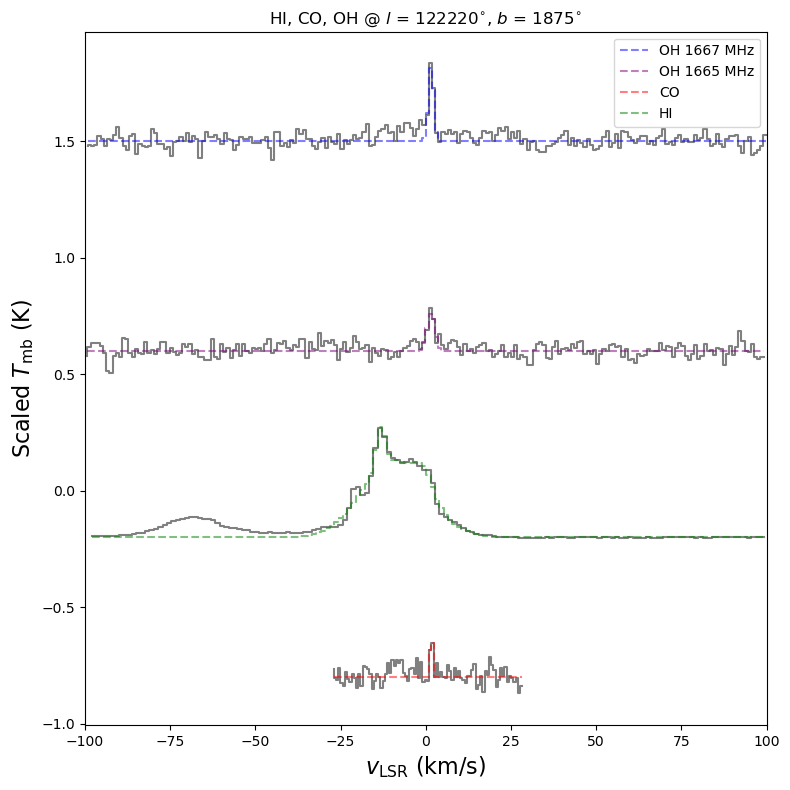

In [48]:
plot_coord(122220, 1875, n_HI = 3, HI_p0 = (1, -10, 25), CO_p0 = (1, 2, 0.5))

In [104]:
#plot_coord(122290, 4133) null

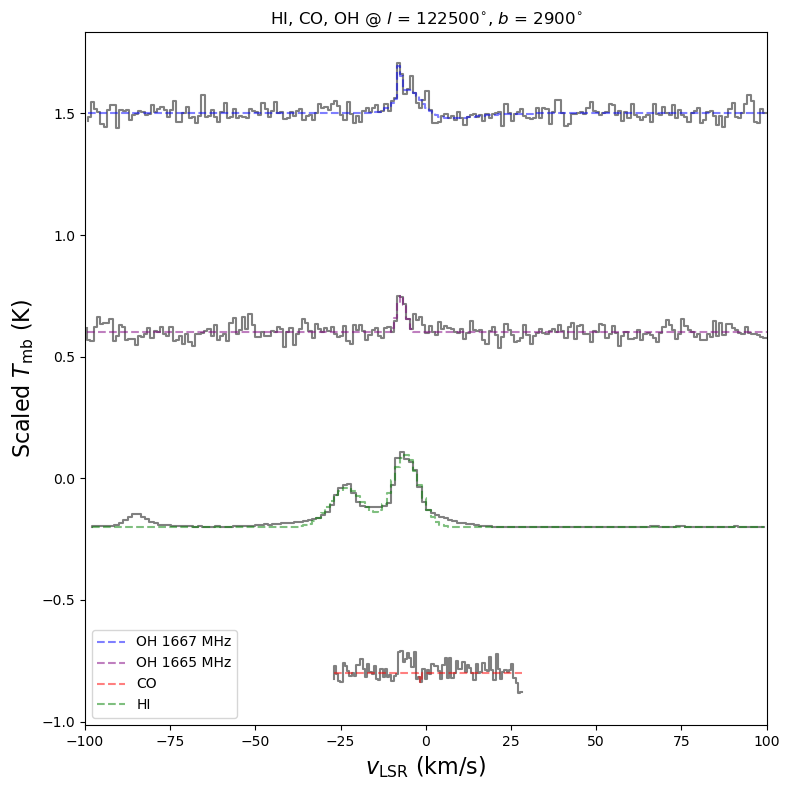

In [55]:
plot_coord(122500, 2900, n_HI = 2, n_67 = 3, HI_p0 = (1, -10, 25), OH67_p0 = (1, -4, 4))

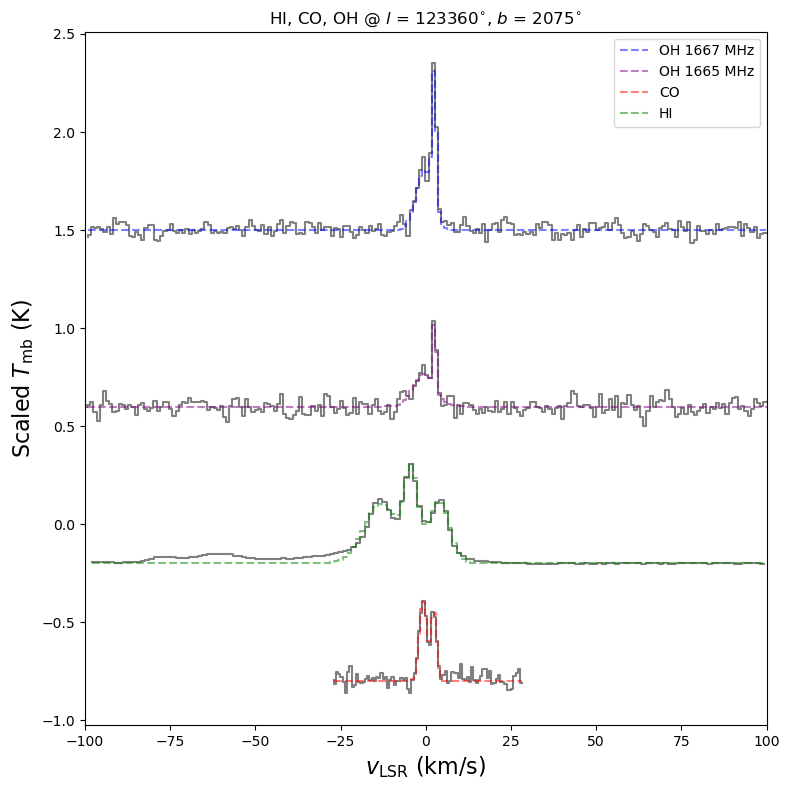

In [79]:
plot_coord(123360, 2075, n_HI = 3, HI_p0 = (2, -3, 1), n_65 = 2, OH65_p0 = (1, 0, 6), n_67 = 3, OH67_p0 = (1, 0, 4), n_CO = 2, CO_p0 = (1, 0, 3))

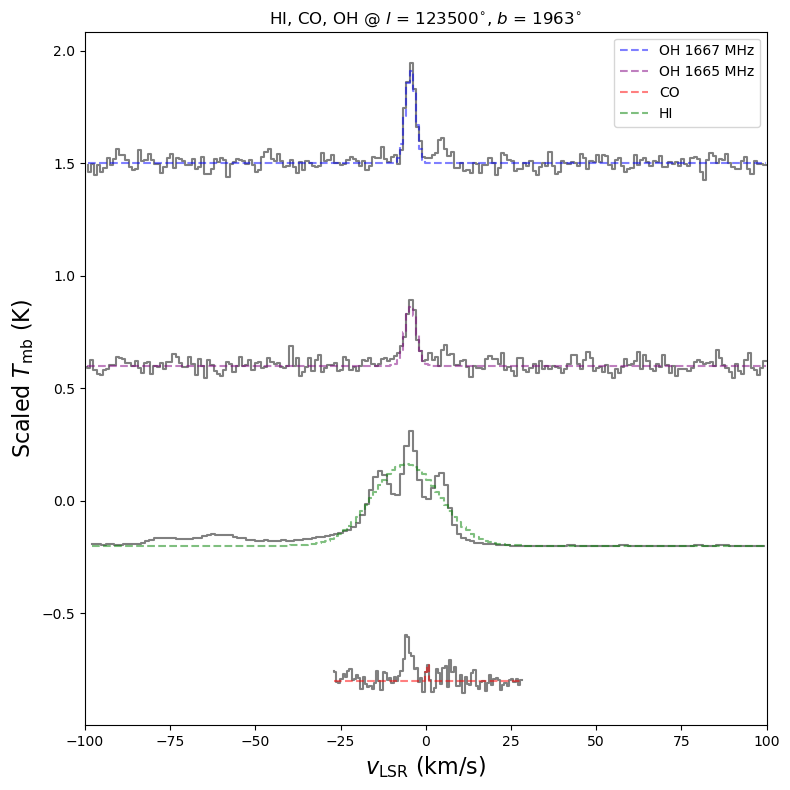

In [67]:
plot_coord(123500, 1963)

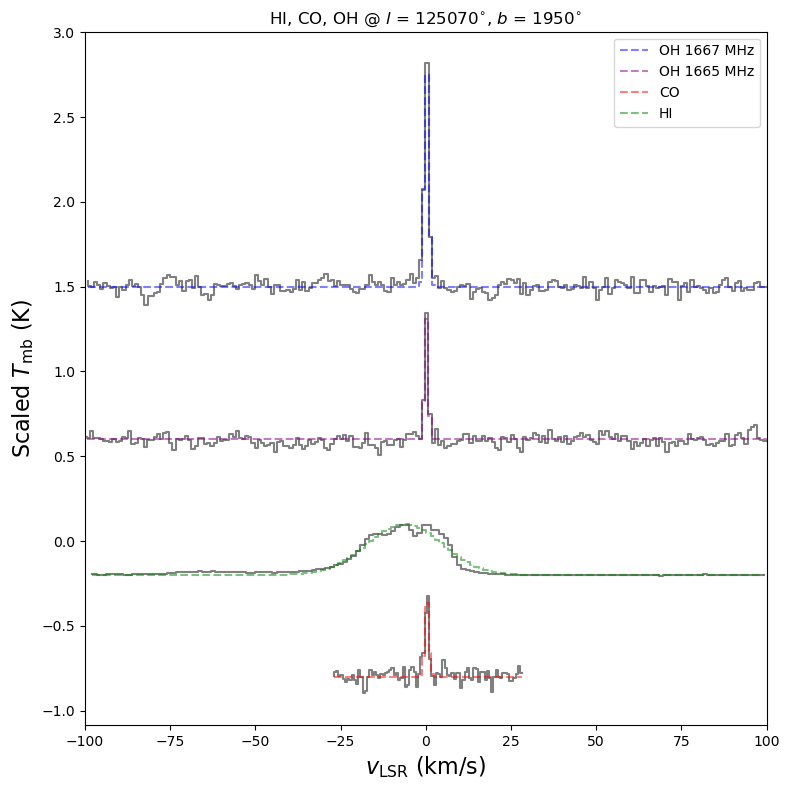

In [68]:
plot_coord(125070, 1950)

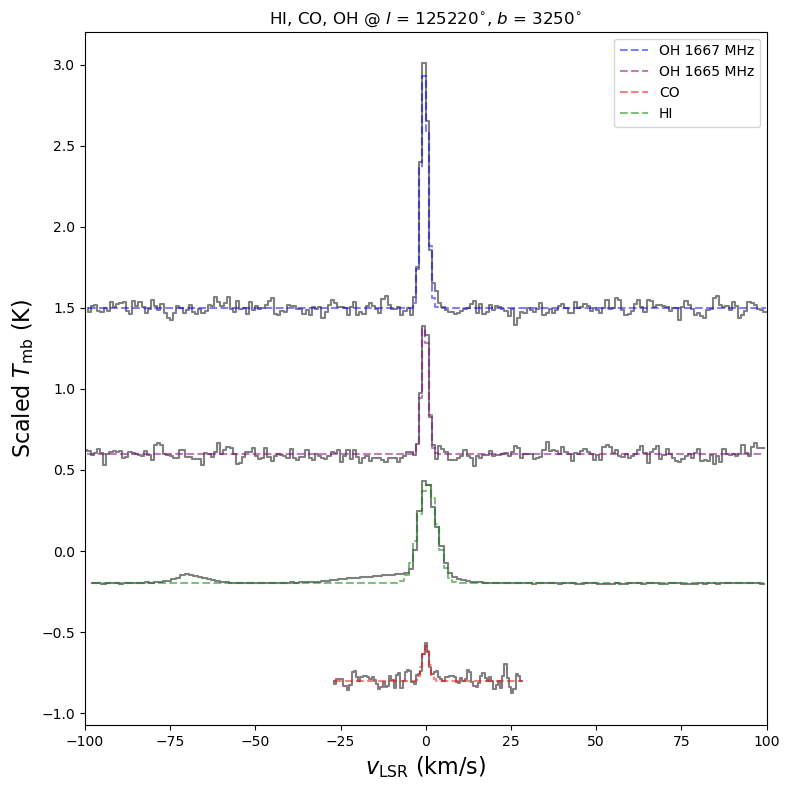

In [69]:
plot_coord(125220, 3250)

In [72]:
#plot_coord(125500, 2200) CO doesn't exist here

In [74]:
#plot_coord(126500, 3250), CO doesn't exist here

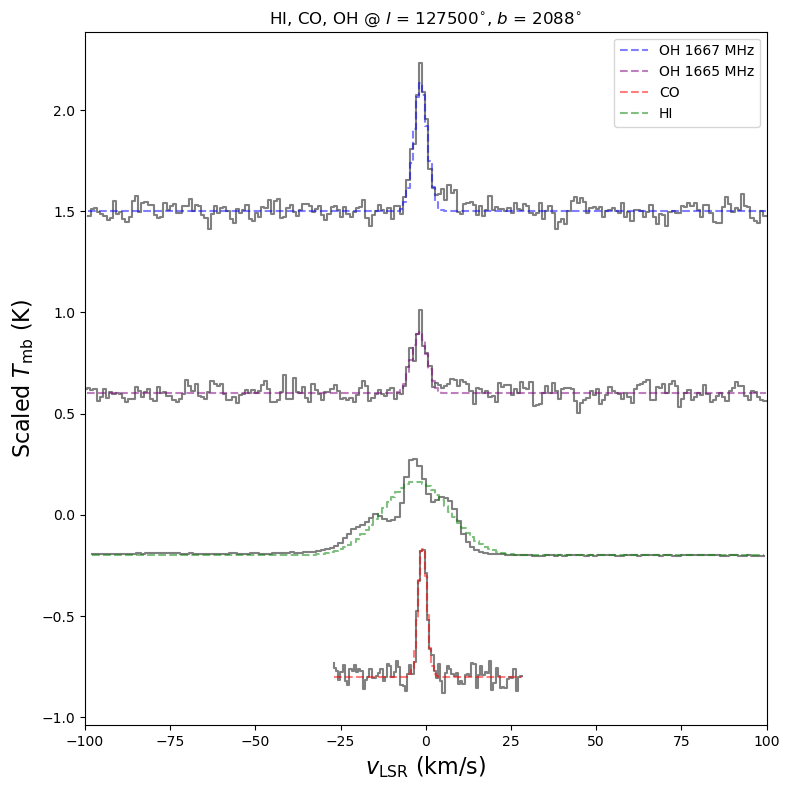

In [75]:
plot_coord(127500, 2088)

In [106]:
#plot_coord(131430, 4667) null

In [107]:
#plot_coord(132220, 3167) null

In [108]:
#plot_coord(134570, 3400) null

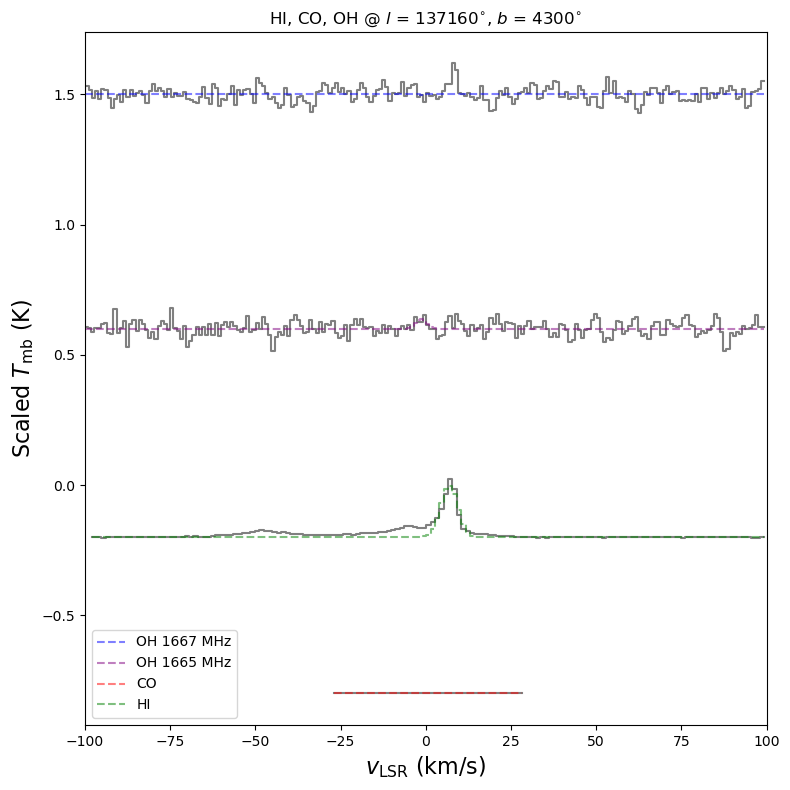

In [80]:
plot_coord(137160, 4300)

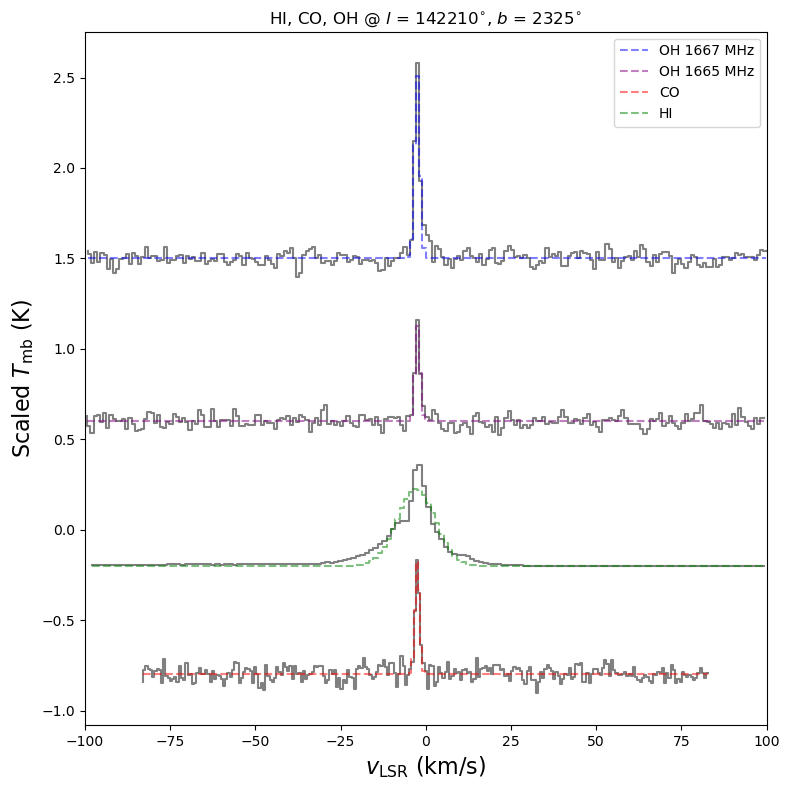

In [81]:
plot_coord(142210, 2325)

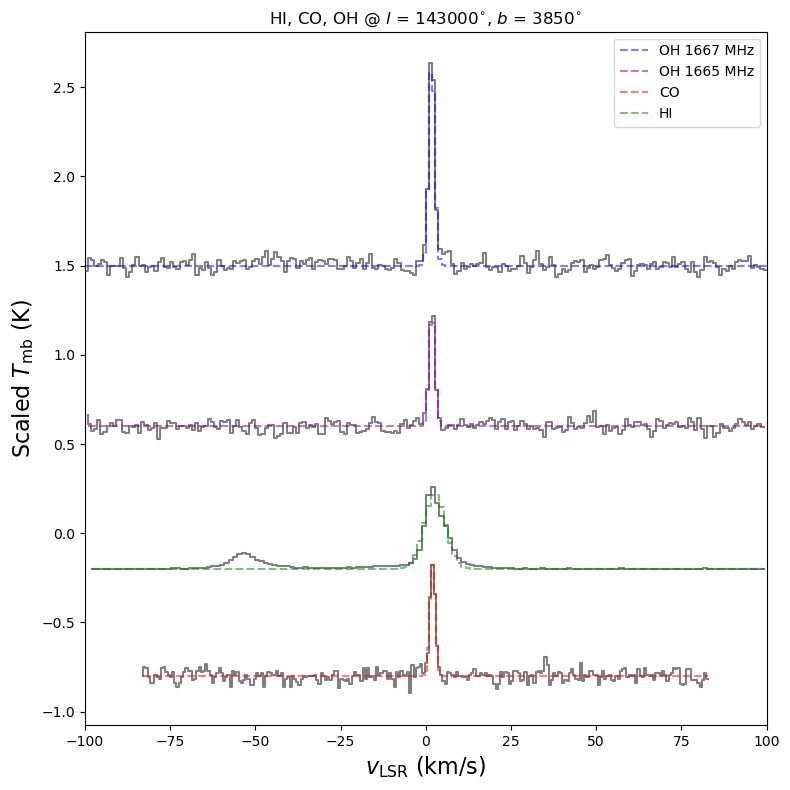

In [83]:
plot_coord(143000, 3850)

In [85]:
#plot_coord(143360, 2425) OH doesn't exist

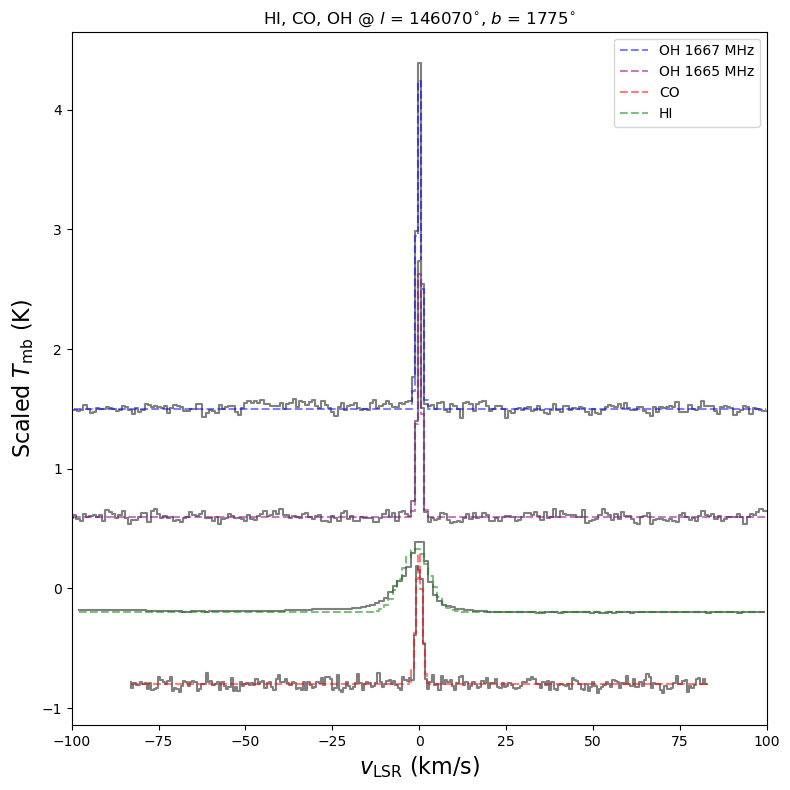

In [86]:
plot_coord(146070, 1775)

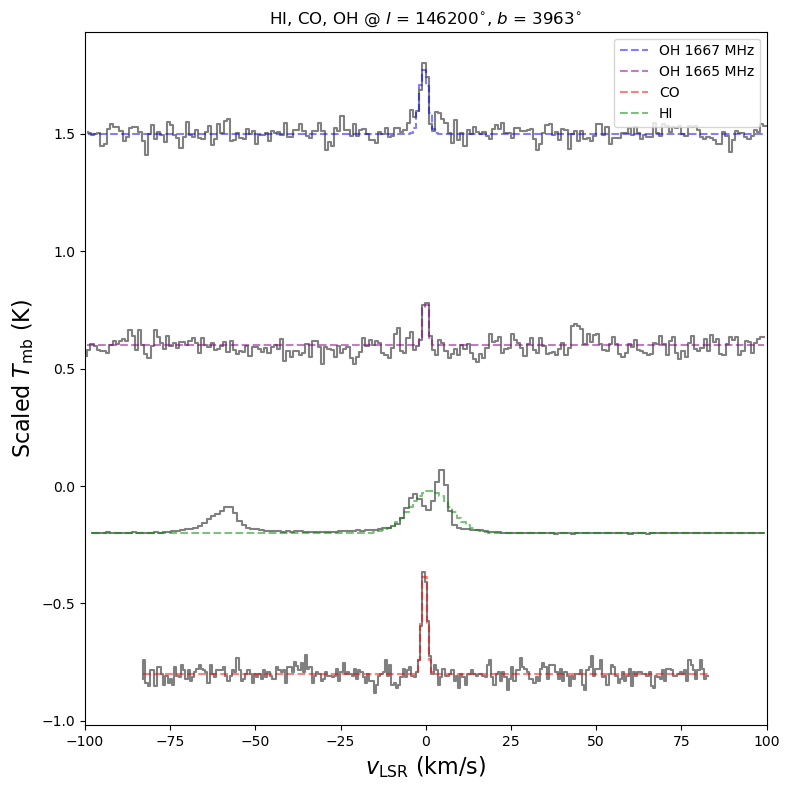

In [87]:
plot_coord(146200, 3963)

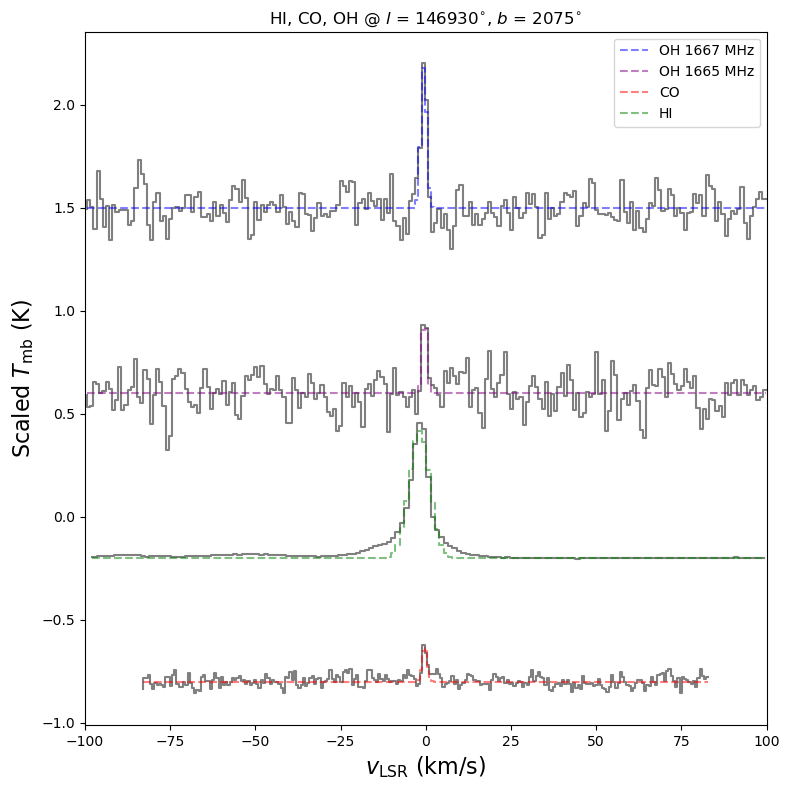

In [88]:
plot_coord(146930, 2075)

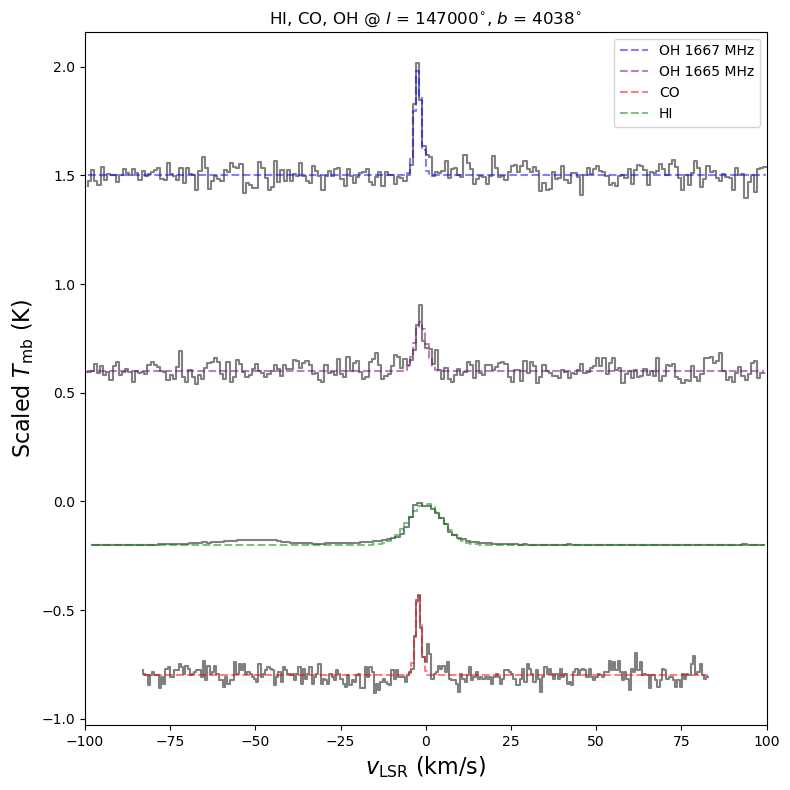

In [89]:
plot_coord(147000, 4038)

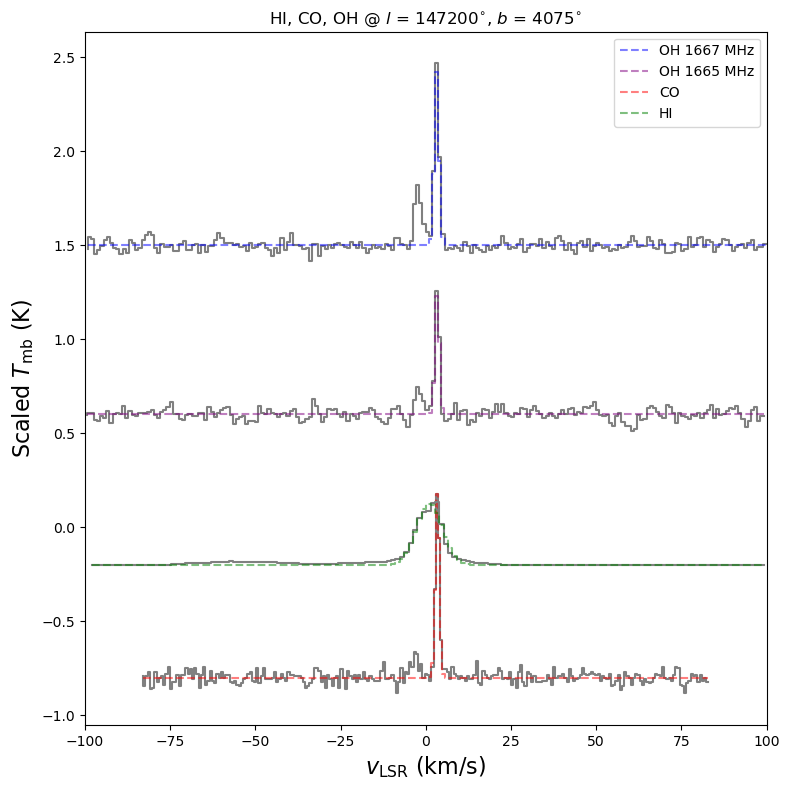

In [90]:
plot_coord(147200, 4075)

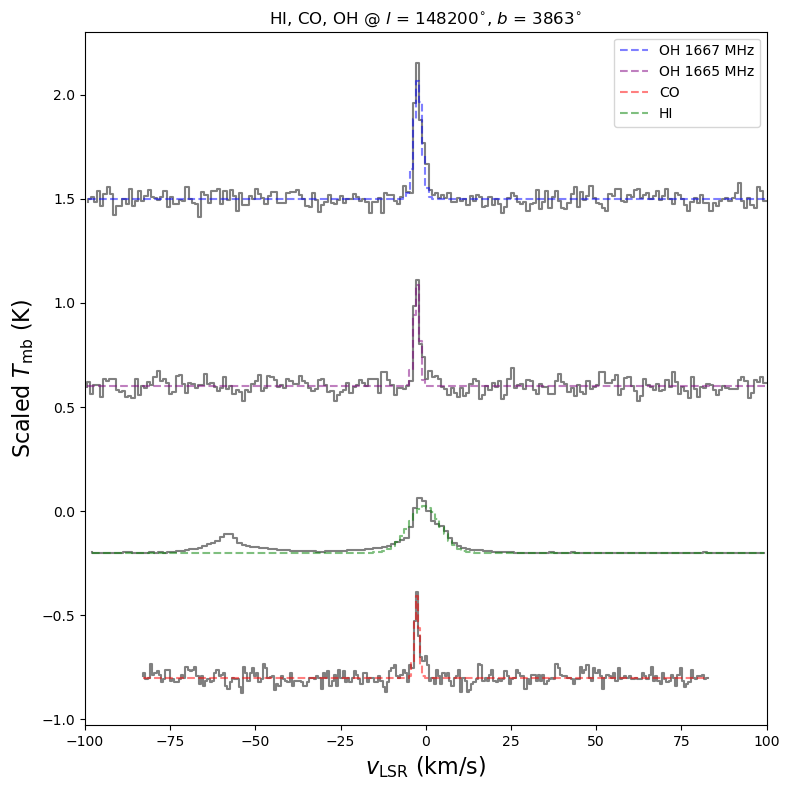

In [91]:
plot_coord(148200, 3863)

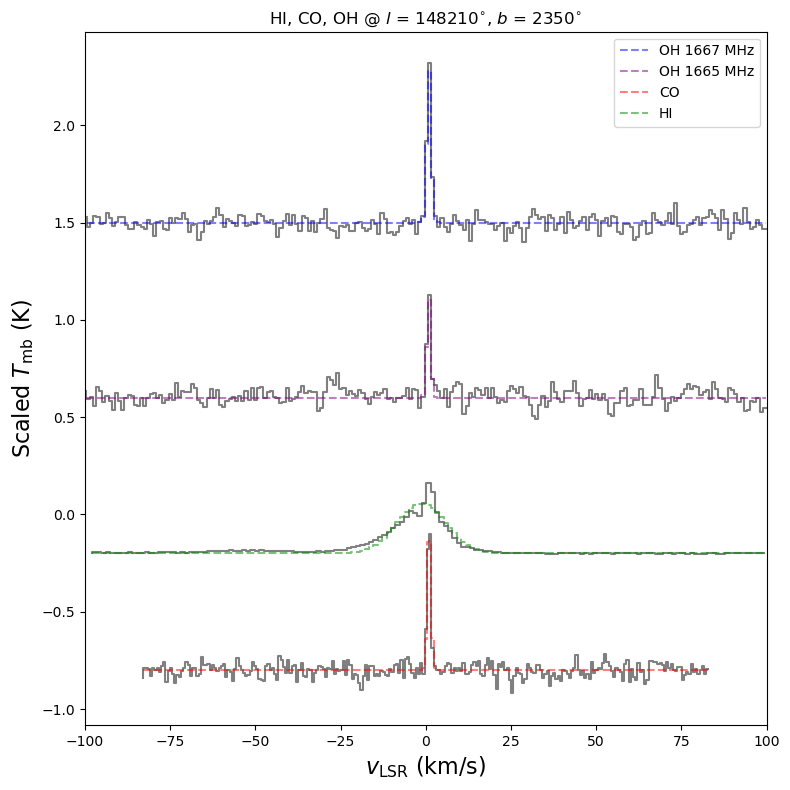

In [92]:
plot_coord(148210, 2350)

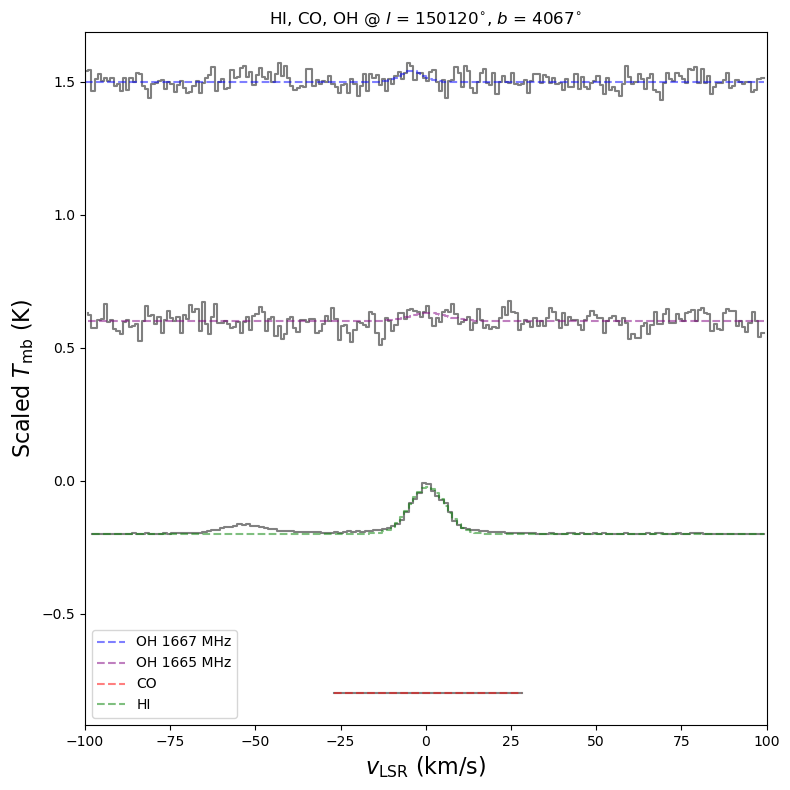

In [93]:
plot_coord(150120, 4067)

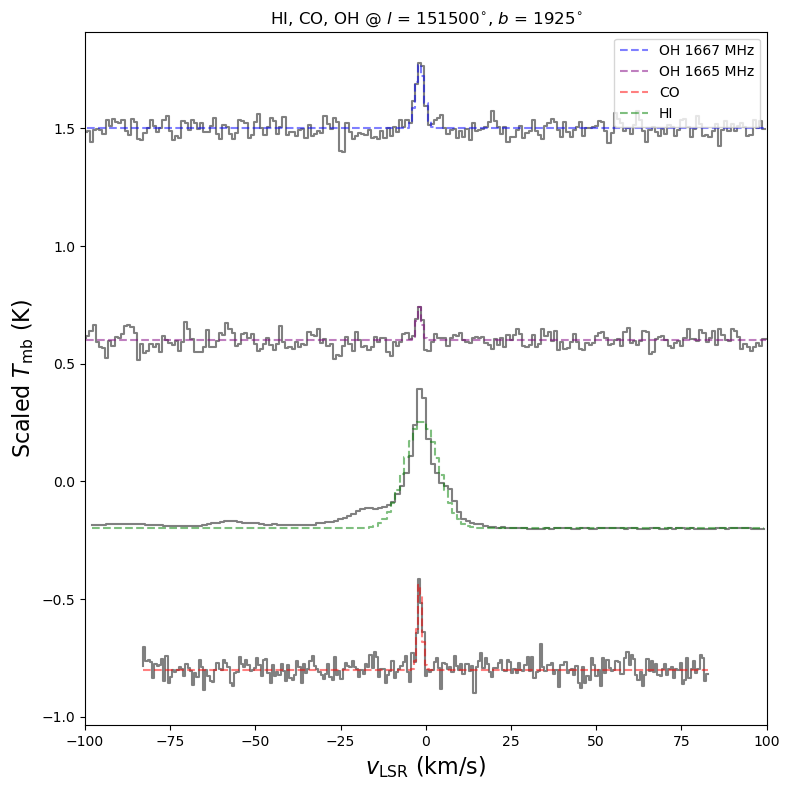

In [94]:
plot_coord(151500, 1925)

In [96]:
#plot_coord(153640, 1925) guesses error

In [98]:
#plot_coord(155670, 2133), CO doesn't exist

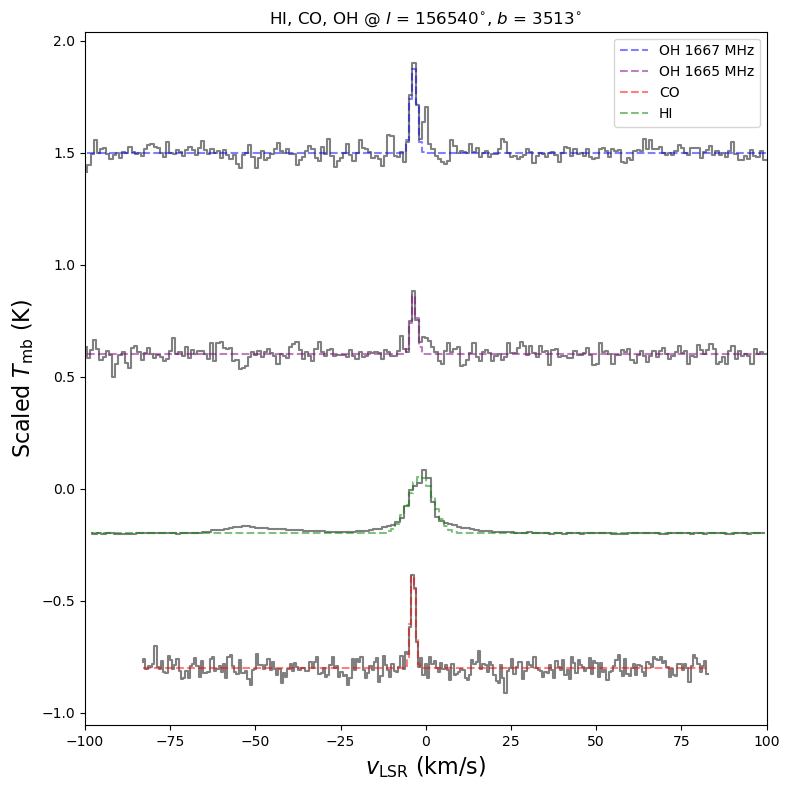

In [99]:
plot_coord(156540, 3513)

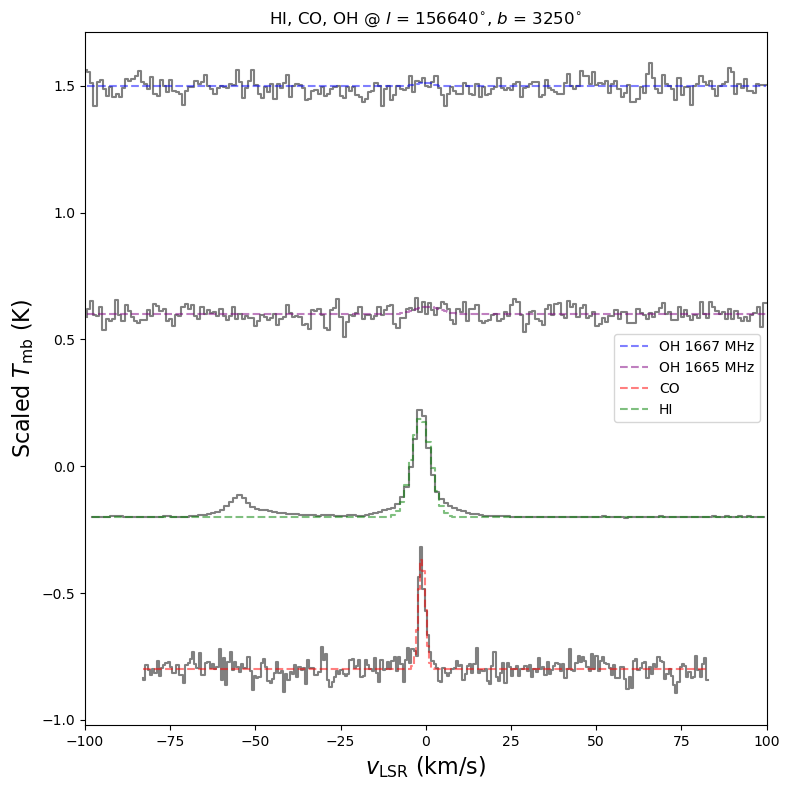

In [101]:
plot_coord(156640, 3250)

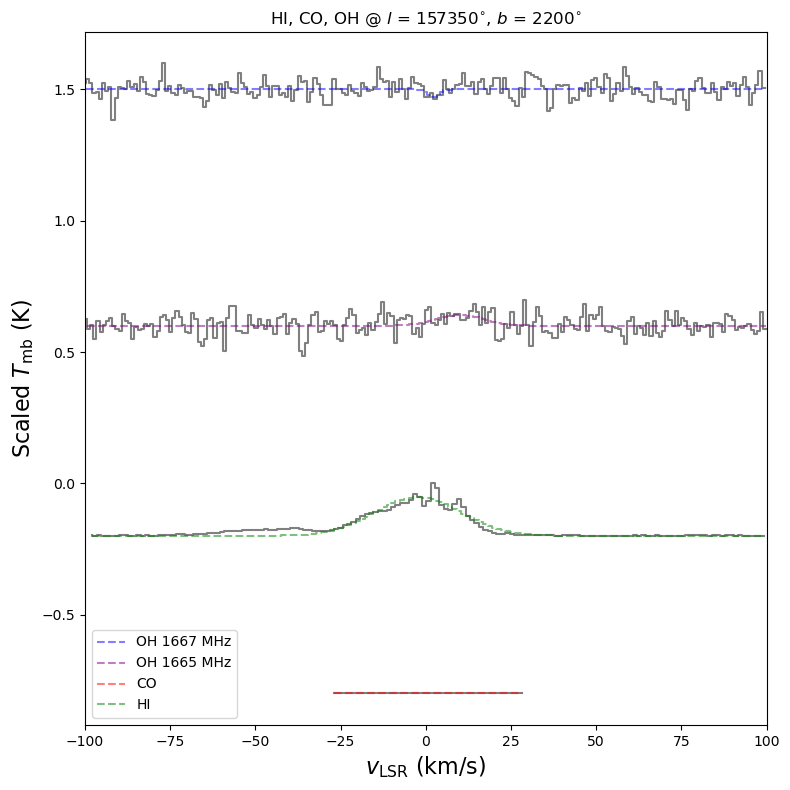

In [102]:
plot_coord(157350, 2200)